In [1]:
import geopandas 
import json
import fiona
import numpy as np
import pandas as pd
import shapely
from bokeh.io import show, reset_output, output_notebook
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter,
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider, Select)
from bokeh.layouts import column, row#, widgetbox
from bokeh.plotting import figure
from bokeh.transform import linear_cmap, log_cmap
from geopy import Point
from shapely.geometry import Polygon
import numpy as np
from bokeh.plotting import figure
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.widgets import Slider

# %matplotlib notebook


In [2]:
geo_ukraine = geopandas.read_file("data/ukraine.json")
geo_ukraine = geo_ukraine[['id', 'name_1', 'geometry']]


geo_ukraine.head()

### standarizing names:
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Cherkasy", 'Cherkasy')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Chernihiv", 'Chernihiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Chernivtsi", 'Chernivtsi')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Crimea", 'Crimea')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Dnipropetrovs'k", 'Dnipropetrovsk')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Donets'k", 'Donetsk')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kharkiv", 'Kharkiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kherson", 'Kherson')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Khmel'nyts'kyy", 'Khmelnytskyi')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kiev City", 'Kyiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kiev", 'Kyiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kirovohrad", 'Kirovohrad')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("L'viv", 'Lviv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Luhans'k", 'Luhansk')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Mykolayiv", 'Mykolaiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Odessa", 'Odesa')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Poltava", 'Poltava')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Rivne", 'Rivne')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Sevastopol", 'Sevastopol')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Sumy", 'Sumy')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Ivano-Frankivs'k", 'Ivano-Frankivsk')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Ternopil'", 'Ternopil')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Transcarpathia", 'Uzhhorod')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Vinnytsya", 'Vinnytsia')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Zaporizhzhya", 'Zaporizhzhia')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Zhytomyr", 'Zhytomyr')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Volyn", 'Lutsk')
geo_ukraine = geo_ukraine.rename(columns = {'name_1': 'oblast'})
geo_ukraine['oblast'].unique()

array(['Cherkasy', 'Chernihiv', 'Chernivtsi', 'Crimea', 'Dnipropetrovsk',
       'Donetsk', 'Kharkiv', 'Kherson', 'Khmelnytskyi', 'Kyiv',
       'Kirovohrad', 'Lviv', 'Luhansk', 'Mykolaiv', 'Odesa', 'Poltava',
       'Rivne', "Sevastopol'", 'Sumy', 'Ivano-Frankivsk', 'Ternopil',
       'Uzhhorod', 'Vinnytsia', 'Lutsk', 'Zaporizhzhia', 'Zhytomyr'],
      dtype=object)

# Votes 2014:

In [3]:
votedf = pd.DataFrame({"vote":[0.5461, 
                                        0.4481, 
                                        0.5672,
                                        0, 
                                        0.4472,
                                        0.3615,
                                        0.6513,
                                        0.3528,
                                        0.4871,
                                        0.5626, 
                                        0.5096,
                                        0.6410, 
                                        0.3317,
                                        0.5241,  
                                        0.6992,
                                        0.4597,
                                        0.4178,
                                        0.5455,
                                        0.5546,
                                        0.5541,
                                        0.6063,
                                        0.622, 
                                        0.6732,
                                        0.3815, 
                                        0.5864],
                                        "oblast":  ['Cherkasy'       ,
                                                    'Chernihiv'      ,
                                                    'Chernivtsi'     ,
                                                    'Crimea'         ,
                                                    'Dnipropetrovsk' ,
                                                    'Donetsk'        ,
                                                    'Ivano-Frankivsk',
                                                    'Kharkiv'        ,
                                                    'Kherson'        ,
                                                    'Khmelnytskyi'   ,
                                                    'Kirovohrad'     ,
                                                    'Kyiv'           ,
                                                    'Luhansk'        ,
                                                    'Lutsk'          ,
                                                    'Lviv'           ,
                                                    'Mykolaiv'       ,
                                                    'Odesa'          ,
                                                    'Poltava'        ,
                                                    'Rivne'          ,
                                                    'Sumy'           ,
                                                    'Ternopil'       ,
                                                    'Uzhhorod'       ,
                                                    'Vinnytsia'      ,
                                                    'Zaporizhzhia'   ,
                                                    'Zhytomyr'       

                                                    ]})

votedf['vote'] = votedf['vote']*100
# votedf

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


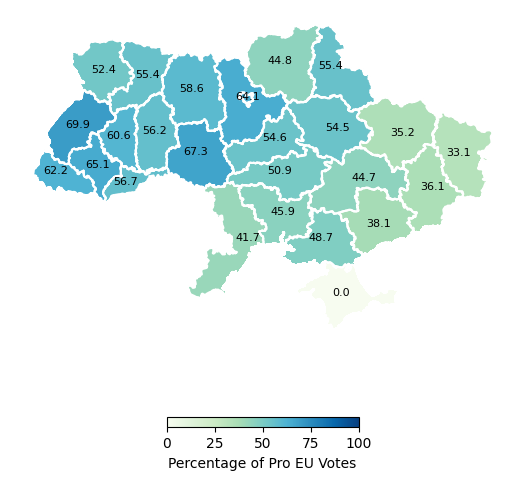

In [27]:
plotting_table= geo_ukraine.merge(votedf, left_on = 'oblast', right_on = 'oblast')


event_min = 0#plotting_table['vote'].min()
event_max = 100#plotting_table['vote'].max()
event_center = (event_min + event_max)/2
norm = TwoSlopeNorm(vmin=event_min, vcenter=event_center, vmax=event_max)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plotting_table.boundary.plot(ax = ax, color = 'white')
p = plotting_table.plot(ax=ax, 
                    column='vote', 
                    cmap='GnBu', 
                    norm = norm, 
                    legend=True,
                    legend_kwds={'label': "Percentage of Pro EU Votes",
                                'shrink': 0.3, 
                                'orientation': "horizontal",
                                },
                    figsize = (20, 10))
leg = p.legend(loc="best")
leg.get_frame().set_alpha(0)
##getting coordinates for labels:
plotting_table['coords'] = plotting_table['geometry'].apply(lambda x: x.representative_point().coords[:])
plotting_table['coords'] = [coords[0] for coords in plotting_table['coords']]
# plotting_table['name'] = [plotting_table['oblast'][i] + '\n' + str(plotting_table['vote'][i])[:4]  for i in range(0, len(plotting_table))]
plotting_table['name'] = [str(plotting_table['vote'][i])[:4]  for i in range(0, len(plotting_table))]
plotting_table.loc[plotting_table['id'] =='gg870xt4706.12', 'name'] = ''

for idx, row in plotting_table.iterrows():
    plt.annotate(text=row['name'], xy=row['coords'],
                 horizontalalignment='center', size = 8, color = 'black')

plt.savefig('results/voter_maps/votes_plot_2014.png')

# Votes 2010:

In [80]:
votedf = pd.DataFrame({"vote":[1-0.547, 
                                        1-0.636, 
                                        1- 0.665,
                                        0.782, 
                                        0.627,
                                        0.904,
                                        1-0.889,
                                        0.714,
                                        0.6,
                                        1-0.7145, 
                                        0.547,
                                        1-0.697, 
                                        0.89,
                                        1-0.819,  
                                        1-0.862,
                                        0.715,
                                        0.741,
                                        1-0.542,
                                        1-0.762,
                                        1-0.629,
                                        0.884,
                                        1-0.547, 
                                        1-0.711,
                                        0.715, 
                                        1-0.575],
                                        "oblast":  ['Cherkasy'       ,
                                                    'Chernihiv'      ,
                                                    'Chernivtsi'     ,
                                                    'Crimea'         ,
                                                    'Dnipropetrovsk' ,
                                                    'Donetsk'        ,
                                                    'Ivano-Frankivsk',
                                                    'Kharkiv'        ,
                                                    'Kherson'        ,
                                                    'Khmelnytskyi'   ,
                                                    'Kirovohrad'     ,
                                                    'Kyiv'           ,
                                                    'Luhansk'        ,
                                                    'Lutsk'          ,
                                                    'Lviv'           ,
                                                    'Mykolaiv'       ,
                                                    'Odesa'          ,
                                                    'Poltava'        ,
                                                    'Rivne'          ,
                                                    'Sumy'           ,
                                                    'Ternopil'       ,
                                                    'Uzhhorod'       ,
                                                    'Vinnytsia'      ,
                                                    'Zaporizhzhia'   ,
                                                    'Zhytomyr'       

                                                    ]})

votedf['vote'] = 100 - votedf['vote']*100
# votedf

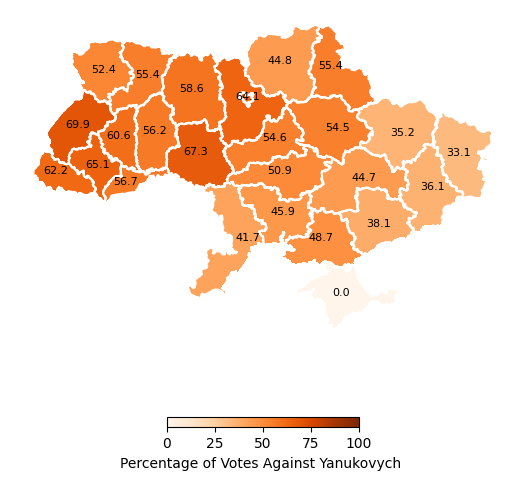

In [28]:
plotting_table= geo_ukraine.merge(votedf, left_on = 'oblast', right_on = 'oblast')


event_min = 0#plotting_table['vote'].min()
event_max = 100#plotting_table['vote'].max()
event_center = (event_min + event_max)/2
norm = TwoSlopeNorm(vmin=event_min, vcenter=event_center, vmax=event_max)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plotting_table.boundary.plot(ax = ax, color = 'white')
plotting_table.plot(ax=ax, 
                    column='vote', 
                    cmap='Oranges', 
                    norm = norm, 
                    legend=True, 
                    legend_kwds={'label': "Percentage of Votes Against Yanukovych ",
                                'orientation': "horizontal",
                                'shrink': 0.3},
                    figsize = (20, 10))

##getting coordinates for labels:
plotting_table['coords'] = plotting_table['geometry'].apply(lambda x: x.representative_point().coords[:])
plotting_table['coords'] = [coords[0] for coords in plotting_table['coords']]
# plotting_table['name'] = [plotting_table['oblast'][i] + '\n' + str(plotting_table['vote'][i])[:4]  for i in range(0, len(plotting_table))]
plotting_table['name'] = [str(plotting_table['vote'][i])[:4]  for i in range(0, len(plotting_table))]
plotting_table.loc[plotting_table['id'] =='gg870xt4706.12', 'name'] = ''

for idx, row in plotting_table.iterrows():
    plt.annotate(text=row['name'], xy=row['coords'],
                 horizontalalignment='center', size = 8, color = 'black')

plt.savefig('results/voter_maps/votes_plot_2010.png')

# Vote 2004:

In [29]:
votedf = pd.DataFrame({"vote":[1-0.7192, 
                                        0.6565, 
                                        1- 0.745,
                                        0.0199, 
                                        0.6361,
                                        0.962,
                                        1-0.9344,
                                        0.7025,
                                        0.5233,
                                        0.6776, 
                                        0.4708,
                                        1-0.7636, 
                                        0.9273,
                                        1-0.8579,  
                                        1-0.9179,
                                        0.6955,
                                        0.6776,
                                        0.6086,
                                        1-0.7665,
                                        0.6609,
                                        1-0.9353,
                                        1-0.55, 
                                        1-0.7585,
                                        0.7033, 
                                        1-0.6041],
                                        "oblast":  ['Cherkasy'       ,
                                                    'Chernihiv'      ,
                                                    'Chernivtsi'     ,
                                                    'Crimea'         ,
                                                    'Dnipropetrovsk' ,
                                                    'Donetsk'        ,
                                                    'Ivano-Frankivsk',
                                                    'Kharkiv'        ,
                                                    'Kherson'        ,
                                                    'Khmelnytskyi'   ,
                                                    'Kirovohrad'     ,
                                                    'Kyiv'           ,
                                                    'Luhansk'        ,
                                                    'Lutsk'          ,
                                                    'Lviv'           ,
                                                    'Mykolaiv'       ,
                                                    'Odesa'          ,
                                                    'Poltava'        ,
                                                    'Rivne'          ,
                                                    'Sumy'           ,
                                                    'Ternopil'       ,
                                                    'Uzhhorod'       ,
                                                    'Vinnytsia'      ,
                                                    'Zaporizhzhia'   ,
                                                    'Zhytomyr'       

                                                    ]})

votedf['vote'] = 100 - votedf['vote']*100
# votedf

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


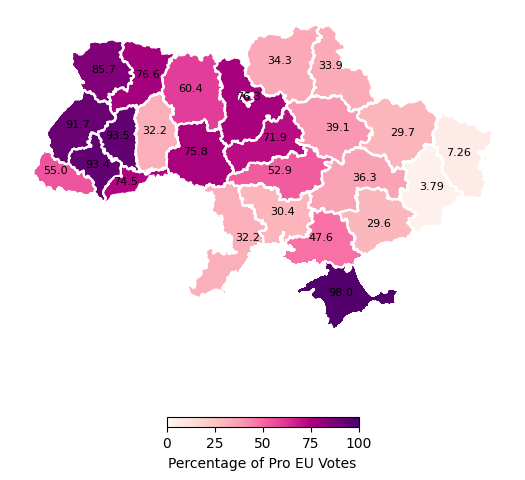

In [31]:
plotting_table= geo_ukraine.merge(votedf, left_on = 'oblast', right_on = 'oblast')


event_min = 0#plotting_table['vote'].min()
event_max = 100#plotting_table['vote'].max()
event_center = (event_min + event_max)/2
norm = TwoSlopeNorm(vmin=event_min, vcenter=event_center, vmax=event_max)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plotting_table.boundary.plot(ax = ax, color = 'white')
p = plotting_table.plot(ax=ax, 
                    column='vote', 
                    cmap='RdPu', 
                    norm = norm, 
                    legend=True,
                    legend_kwds={'label': "Percentage of Pro EU Votes",
                                'shrink': 0.3, 
                                'orientation': "horizontal",
                                },
                    figsize = (20, 10))
leg = p.legend(loc="best")
leg.get_frame().set_alpha(0)
##getting coordinates for labels:
plotting_table['coords'] = plotting_table['geometry'].apply(lambda x: x.representative_point().coords[:])
plotting_table['coords'] = [coords[0] for coords in plotting_table['coords']]
# plotting_table['name'] = [plotting_table['oblast'][i] + '\n' + str(plotting_table['vote'][i])[:4]  for i in range(0, len(plotting_table))]
plotting_table['name'] = [str(plotting_table['vote'][i])[:4]  for i in range(0, len(plotting_table))]
plotting_table.loc[plotting_table['id'] =='gg870xt4706.12', 'name'] = ''

for idx, row in plotting_table.iterrows():
    plt.annotate(text=row['name'], xy=row['coords'],
                 horizontalalignment='center', size = 8, color = 'black')

plt.savefig('results/voter_maps/votes_plot_2004.png')